In [1]:
################################ARIMA#######################
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

<ipython-input-2-c872f0faf6b9>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Date
2014-01-02    4969
2014-01-03    4190
2014-01-04    5173
2014-01-06    6194
2014-01-07    5539
Name: Sale, dtype: int64


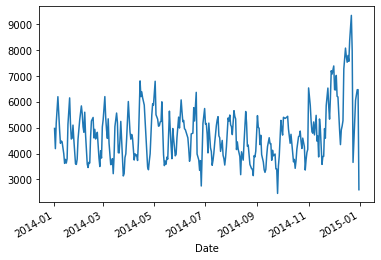

In [2]:
import os
import numpy as np
from pandas import read_csv, DataFrame
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

def parser(x):
	return datetime.strptime(x, '%d/%m/%Y')

file = "C:/Users/gurpr/Videos/BetaSci/Rossmann_Store1_Data.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(file))
df = read_csv(os.path.basename(file), header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(df.head())
df.plot()
pyplot.show()

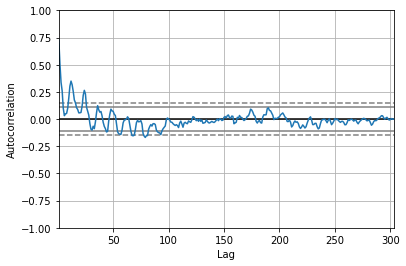

In [3]:
autocorrelation_plot(df)
pyplot.show()


C:\Users\gurpr\Videos\BetaSci\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\gurpr\Videos\BetaSci\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\gurpr\Videos\BetaSci\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                  303
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2421.461
Date:                Wed, 03 Mar 2021   AIC                           4854.921
Time:                        14:14:36   BIC                           4877.184
Sample:                             0   HQIC                          4863.829
                                - 303                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0611      0.043     -1.421      0.155      -0.145       0.023
ar.L2         -0.1296      0.070     -1.857      0.063      -0.266       0.007
ar.L3         -0.2042      0.066     -3.099      0.0

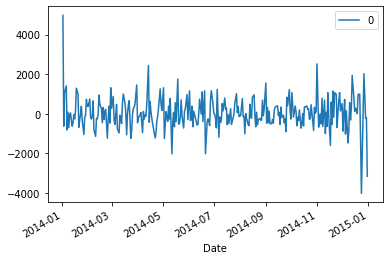

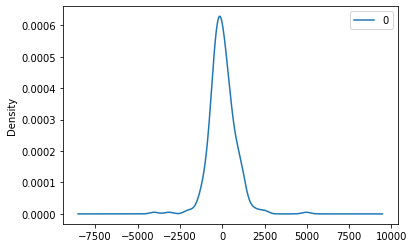

In [4]:
# fit model
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
from pandas import read_csv, DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [5]:
# split into train and test sets
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=4050.073205, expected=3869.000000
predicted=3882.669958, expected=4094.000000
predicted=3950.036569, expected=5464.000000
predicted=5548.516856, expected=5008.000000
predicted=4612.170126, expected=4978.000000
predicted=4810.705810, expected=4346.000000
predicted=4420.091146, expected=4706.000000
predicted=4366.769260, expected=3959.000000
predicted=4178.336499, expected=3676.000000
predicted=3670.490941, expected=3377.000000
predicted=3731.248463, expected=3275.000000
predicted=3221.146076, expected=3392.000000
predicted=3649.066659, expected=3906.000000
predicted=3976.314546, expected=4270.000000
predicted=4280.049114, expected=4611.000000
predicted=4519.770646, expected=4381.000000
predicted=4274.234397, expected=4383.000000
predicted=4212.977945, expected=3740.000000
predicted=3693.821143, expected=4128.000000
predicted=4076.277455, expected=3911.000000
predicted=4058.256306, expected=3982.000000
predicted=3907.034507, expected=3407.000000
predicted=3643.295820, expected=

Test RMSE: 896.328


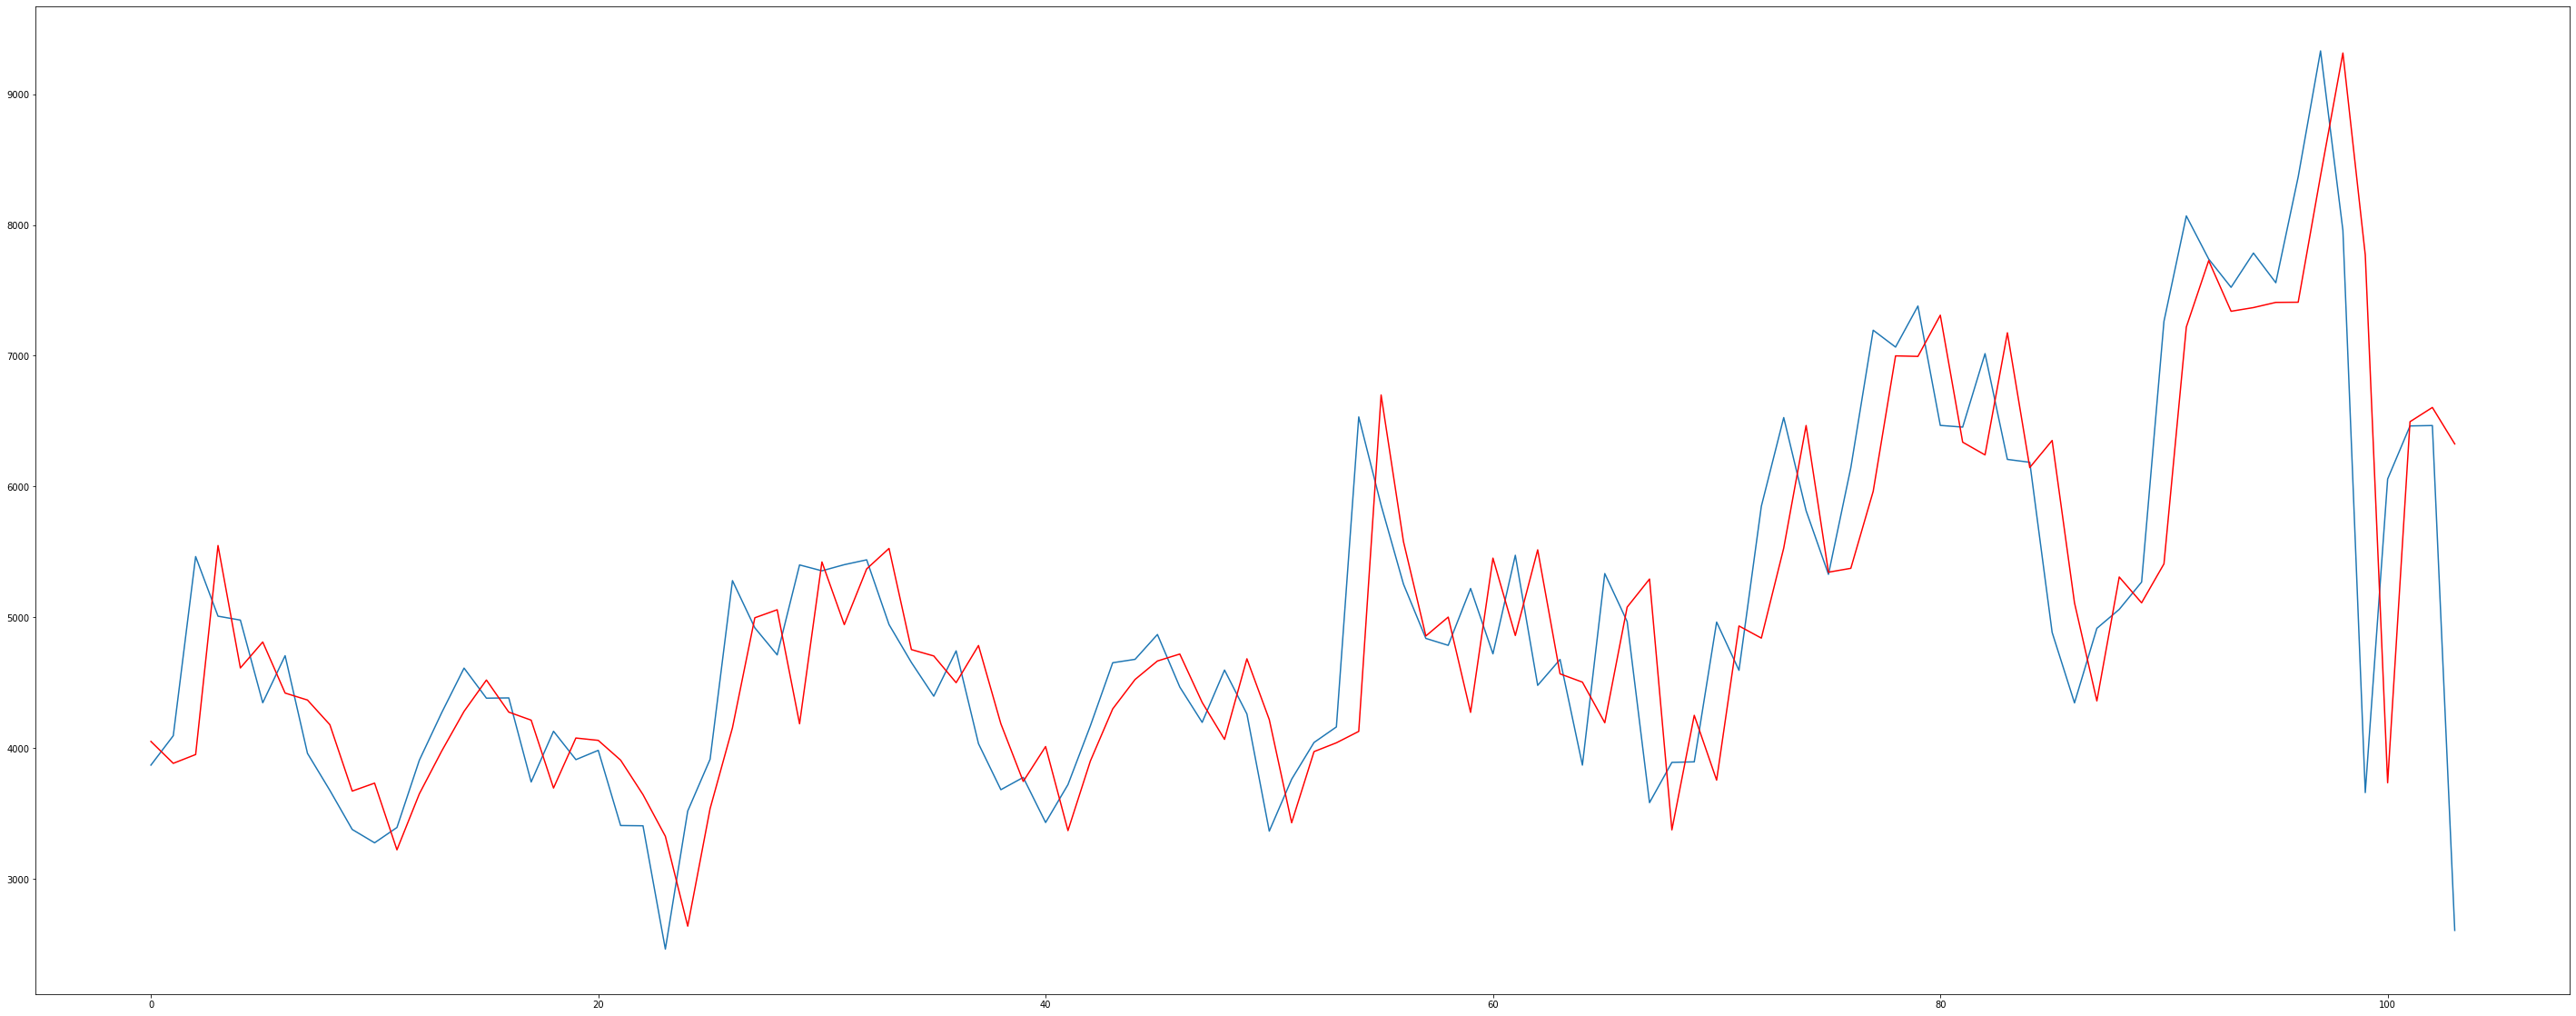

In [6]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.figure(figsize=(50,20))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.savefig('arima.png')
pyplot.show()

